In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# sklearn.linear_model.Perceptron

In [2]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(random_state=0)
clf.fit(X, y)
clf.score(X, y)

Perceptron()

0.9393433500278241

- Perceptron is a classification algorithm which shares the same underlying implementation with SGDClassifier. 
- In fact, Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).
           * No learning rate, No regularization
           * learning_rate 는 default '0.01'이나 eta0를 '1'로 세팅하여 학습효과를 배제

In [3]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='perceptron',
                    eta0=1,
                    learning_rate = 'constant',
                    penalty = None,
                    random_state=0)
clf.fit(X, y)
clf.score(X, y)

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', penalty=None,
              random_state=0)

0.9393433500278241

In [4]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 1,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'perceptron',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# sklearn.neural_network.MLPClassifier
- Multi-layer Perceptron classifier.
- This model optimizes the log-loss function using LBFGS or stochastic gradient descent.
- <font color='red'> 사이킷 런에도 Multi-layer Perceptron은 GPU를 사용하지 않고 CPU를 사용 (Keras는 GPU사용)

In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X, y)
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [13]:
clf.fit(X, y)
clf.score(X, y)

MLPClassifier(max_iter=300, random_state=1)

1.0

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [17]:
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

array([[0.03838405, 0.96161595]])

array([1, 0, 1, 0, 1])

0.88

# 1.17. Neural network models (supervised)
## 1.17.1. Multi-layer Perceptron
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html

## 1.17.2. Classification

In [19]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [20]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

Currently, MLPClassifier supports only the Cross-Entropy loss function, which allows probability estimates by running the predict_proba method.

In [28]:
clf.predict_proba([[2., 2.], [-1., -2.]])

array([[1.96718015e-004, 9.99803282e-001],
       [1.00000000e+000, 4.67017947e-144]])

### MLPClassifier supports multi-class classification by applying Softmax as the output function.
Further, the model supports multi-label classification in which a sample can belong to more than one class. For each class, the raw output passes through the logistic function. Values larger or equal to 0.5 are rounded to 1, otherwise to 0. For a predicted output of a sample, the indices where the value is 1 represents the assigned classes of that sample:

In [30]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(X, y)


clf.predict([[1., 2.]])

clf.predict([[0., 0.]])

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

array([[1, 1]])

array([[0, 1]])

### Compare Stochastic learning strategies for MLPClassifier
https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py

## 1.17.3. Regression

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)

array([-0.98506347, -7.19854141])

0.4162338898076595

### 1.17.4. Regularization
- Both MLPRegressor and MLPClassifier use parameter alpha for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes. 
- Following plot displays varying decision function with value of alpha.

### Varying regularization in Multi-layer Perceptron
- A comparison of different values for regularization parameter ‘alpha’ on synthetic datasets. 
- The plot shows that different alphas yield different decision functions.

- Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. 
      * Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. 
      * Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.

Automatically created module for IPython interactive environment


(-1.818500344394381, 2.661499655605623)

(-1.5357020680498332, 2.06429793195017)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.1, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.818500344394381, 2.661499655605623)

(-1.5357020680498332, 2.06429793195017)

[]

[]

Text(0.5, 1.0, 'alpha 0.10')

Text(2.3614996556056234, -1.2357020680498332, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.31622776601683794, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.818500344394381, 2.661499655605623)

(-1.5357020680498332, 2.06429793195017)

[]

[]

Text(0.5, 1.0, 'alpha 0.32')

Text(2.3614996556056234, -1.2357020680498332, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1.0, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.818500344394381, 2.661499655605623)

(-1.5357020680498332, 2.06429793195017)

[]

[]

Text(0.5, 1.0, 'alpha 1.00')

Text(2.3614996556056234, -1.2357020680498332, '.93')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=3.1622776601683795, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.818500344394381, 2.661499655605623)

(-1.5357020680498332, 2.06429793195017)

[]

[]

Text(0.5, 1.0, 'alpha 3.16')

Text(2.3614996556056234, -1.2357020680498332, '.82')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=10.0, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.818500344394381, 2.661499655605623)

(-1.5357020680498332, 2.06429793195017)

[]

[]

Text(0.5, 1.0, 'alpha 10.00')

Text(2.3614996556056234, -1.2357020680498332, '.82')

(-1.6318489313792643, 1.6281510686207386)

(-1.7894269424127711, 1.5705730575872319)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.1, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.6318489313792643, 1.6281510686207386)

(-1.7894269424127711, 1.5705730575872319)

[]

[]

Text(0.5, 1.0, 'alpha 0.10')

Text(1.3281510686207385, -1.489426942412771, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.31622776601683794, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.6318489313792643, 1.6281510686207386)

(-1.7894269424127711, 1.5705730575872319)

[]

[]

Text(0.5, 1.0, 'alpha 0.32')

Text(1.3281510686207385, -1.489426942412771, '.80')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1.0, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.6318489313792643, 1.6281510686207386)

(-1.7894269424127711, 1.5705730575872319)

[]

[]

Text(0.5, 1.0, 'alpha 1.00')

Text(1.3281510686207385, -1.489426942412771, '.80')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=3.1622776601683795, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.6318489313792643, 1.6281510686207386)

(-1.7894269424127711, 1.5705730575872319)

[]

[]

Text(0.5, 1.0, 'alpha 3.16')

Text(1.3281510686207385, -1.489426942412771, '.75')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=10.0, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.6318489313792643, 1.6281510686207386)

(-1.7894269424127711, 1.5705730575872319)

[]

[]

Text(0.5, 1.0, 'alpha 10.00')

Text(1.3281510686207385, -1.489426942412771, '.42')

(-1.2538387851680652, 5.54616121483194)

(-2.5031712438256966, 3.5568287561743093)

[]

[]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.1, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.2538387851680652, 5.54616121483194)

(-2.5031712438256966, 3.5568287561743093)

[]

[]

Text(0.5, 1.0, 'alpha 0.10')

Text(5.2461612148319405, -2.2031712438256967, '.82')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=0.31622776601683794, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.2538387851680652, 5.54616121483194)

(-2.5031712438256966, 3.5568287561743093)

[]

[]

Text(0.5, 1.0, 'alpha 0.32')

Text(5.2461612148319405, -2.2031712438256967, '.80')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=1.0, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.2538387851680652, 5.54616121483194)

(-2.5031712438256966, 3.5568287561743093)

[]

[]

Text(0.5, 1.0, 'alpha 1.00')

Text(5.2461612148319405, -2.2031712438256967, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=3.1622776601683795, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.2538387851680652, 5.54616121483194)

(-2.5031712438256966, 3.5568287561743093)

[]

[]

Text(0.5, 1.0, 'alpha 3.16')

Text(5.2461612148319405, -2.2031712438256967, '.95')

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(alpha=10.0, early_stopping=True,
                               hidden_layer_sizes=[100, 100], max_iter=2000,
                               random_state=1, solver='lbfgs'))])

(-1.2538387851680652, 5.54616121483194)

(-2.5031712438256966, 3.5568287561743093)

[]

[]

Text(0.5, 1.0, 'alpha 10.00')

Text(5.2461612148319405, -2.2031712438256967, '.95')

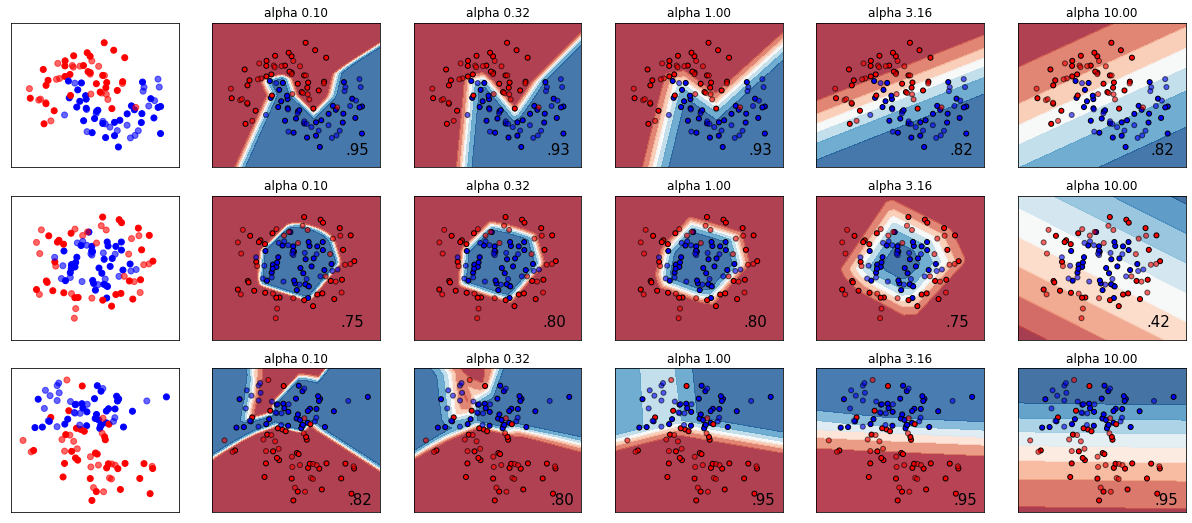

In [45]:
print(__doc__)


# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()